### Adam Optimizer

Adam takes the combines the best of rmsprop and momentum and it works for almost any tasks. Adam has an exponential moving average of the gradients, like the momentum term that can be added to SGD, and an exponential moving average of squared gradients, like RMSprop and Adadelta.


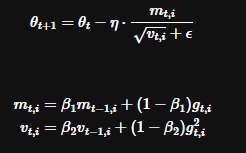

Both 𝑚 and v start at zero, so they are initially "biased" towards smaller values. To correct this, "bias-corrected" values 𝑚^ and 𝑣^ are used, which adjust for the fact that the averages start from zero.
This is why we saw a huge loss for the first steps of Adagrad, Adadelta and RMSprop.

So now using bias corrected values , we have - 

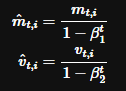

The final Adam eq -

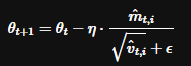

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Set random seed for reproducibility
torch.manual_seed(2024)

# Hyperparameters
n_embd = 10
n_hidden = 64
n_classes = 10
batch_size = 64
learning_rate = 0.01
num_epochs = 10


# Load MNIST dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

train_dataset = datasets.MNIST(root='D:/advanced_ml/01-backprop-by-hand/data', train=True, download=False, transform=transform)
test_dataset = datasets.MNIST(root='D:/advanced_ml/01-backprop-by-hand/data', train=False, download=False, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Define the model
class SimpleNet(nn.Module):
    def __init__(self):
        super(SimpleNet, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28 * 28, n_hidden)
        self.fc2 = nn.Linear(n_hidden, n_classes)

    def forward(self, x):
        x = self.flatten(x)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = SimpleNet()

# Initialize weights as per your example
g = torch.Generator().manual_seed(2024)

model.fc1.weight.data = torch.randn((n_hidden, 28 * 28), generator=g) * 0.1
model.fc1.bias.data = torch.randn(n_hidden, generator=g) * 0.1

model.fc2.weight.data = torch.randn((n_classes, n_hidden), generator=g) * 0.1
model.fc2.bias.data = torch.randn(n_classes, generator=g) * 0.1

parameters = list(model.parameters())

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = learning_rate, betas=(0.9, 0.999))

train_losses = []
epoch_losses = []

# Training loop
for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item()
        
        if batch_idx % 100 == 0:
            print(f'Epoch {epoch+1}/{num_epochs}, Batch {batch_idx}/{len(train_loader)}, Loss: {loss.item():.4f}')
        
        train_losses.append(loss.item())
    
    avg_loss = total_loss / len(train_loader)
    epoch_losses.append(avg_loss)
    print(f'Epoch {epoch+1}/{num_epochs}, Average Loss: {avg_loss:.4f}')
    print("-------------------------------")

Epoch 1/10, Batch 0/938, Loss: 3.5113
Epoch 1/10, Batch 100/938, Loss: 0.2915
Epoch 1/10, Batch 200/938, Loss: 0.3376
Epoch 1/10, Batch 300/938, Loss: 0.3620
Epoch 1/10, Batch 400/938, Loss: 0.1108
Epoch 1/10, Batch 500/938, Loss: 0.1074
Epoch 1/10, Batch 600/938, Loss: 0.2740
Epoch 1/10, Batch 700/938, Loss: 0.3639
Epoch 1/10, Batch 800/938, Loss: 0.5472
Epoch 1/10, Batch 900/938, Loss: 0.2388
Epoch 1/10, Average Loss: 0.2931
-------------------------------
Epoch 2/10, Batch 0/938, Loss: 0.1806
Epoch 2/10, Batch 100/938, Loss: 0.1417
Epoch 2/10, Batch 200/938, Loss: 0.1906
Epoch 2/10, Batch 300/938, Loss: 0.2294
Epoch 2/10, Batch 400/938, Loss: 0.1818
Epoch 2/10, Batch 500/938, Loss: 0.1520
Epoch 2/10, Batch 600/938, Loss: 0.2822
Epoch 2/10, Batch 700/938, Loss: 0.1541
Epoch 2/10, Batch 800/938, Loss: 0.2808
Epoch 2/10, Batch 900/938, Loss: 0.0746
Epoch 2/10, Average Loss: 0.2085
-------------------------------
Epoch 3/10, Batch 0/938, Loss: 0.2599
Epoch 3/10, Batch 100/938, Loss: 0.2

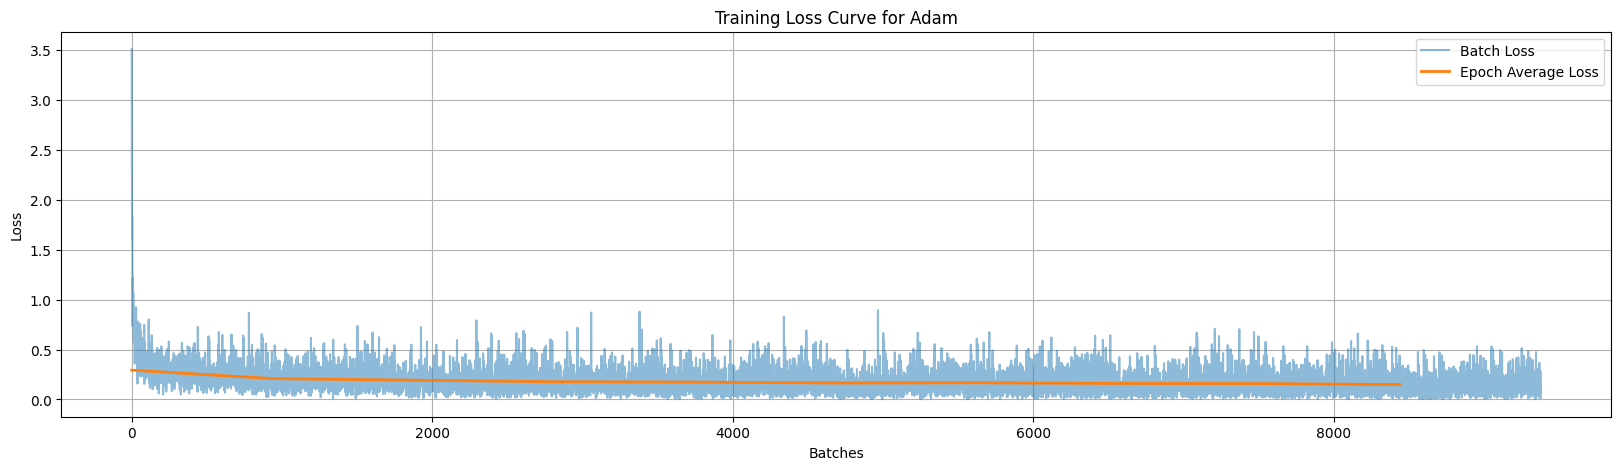

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 5))
plt.plot(train_losses, label='Batch Loss', alpha=0.5)
plt.plot(range(0, len(train_losses), len(train_loader)), epoch_losses, label='Epoch Average Loss', linewidth=2)
plt.xlabel('Batches')
plt.ylabel('Loss')
plt.title('Training Loss Curve for Adam')
plt.legend()
plt.grid(True)